# Name: Param Chordiya
# Roll No: 32119
# Div: TE-5
# Assignment 2: Skewness and Kurtosis

In [4]:
import pandas as pd
import numpy as np
import random

# 1) Creating DataFrame

In [5]:
# Commenting random library after using as it changes values of entries each time it is run
# import random

# Creating a dataframe
df = pd.DataFrame()

# Creating column having student roll numbers
df['Student Roll No'] = [i for i in range(1,101)]

# Creating columns containing different subject marks for each student
df['Physics Marks'] = [random.randint(30,100) for i in range(1,101)]
df['Chemistry Marks'] = [random.randint(50,100) for i in range(1,101)]
df['Maths Marks'] = [random.randint(20,100) for i in range(1,101)]
df['Total Marks'] = df['Physics Marks'] + df['Chemistry Marks'] + df['Maths Marks']
df

,Student Roll No,Physics Marks,Chemistry Marks,Maths Marks,Total Marks
0,1,50,64,34,148
1,2,100,78,35,213
2,3,53,82,30,165
3,4,30,67,65,162
4,5,80,90,87,257
...,...,...,...,...,...
95,96,42,99,95,236
96,97,88,83,73,244
97,98,59,61,61,181
98,99,58,92,73,223


# 2) Calculating Mean and Standard Deviation 

In [6]:
# Calculating central tendencies of data
mean = np.mean(df['Physics Marks'])
std_dev = np.std(df['Physics Marks'])

print("The Mean of the marks obtained by the students is: ", mean)
print("The Standard Deviation of the marks obtained by the students is: ", std_dev)

The Mean of the marks obtained by the students is:  66.17
The Standard Deviation of the marks obtained by the students is:  20.566018088098627


In [7]:
# Since we need to use the value of 'e' we import math library
import math

# 3) Calculating Probability Density Function

In [8]:
# Calculating manually

numerator = math.e ** (-0.5*(((df['Physics Marks']-mean)/std_dev)**2))
denominator = (std_dev*((2*math.pi)**0.5))

Normal_dist = numerator/denominator
Normal_dist_rounded = [round(i, 6) for i in Normal_dist]
Normal_dist_rounded[:5]

[0.01424, 0.005014, 0.015802, 0.004131, 0.015473]

In [9]:
# Calculating using inbuilt functions

from scipy.stats import norm

Normal_dist1 = norm.pdf(df['Physics Marks'], mean, std_dev)
Normal_dist1_rounded = [round(i, 6) for i in Normal_dist1]
Normal_dist1_rounded[:5]

[0.01424, 0.005014, 0.015802, 0.004131, 0.015473]

# 4) Checking if calculated values and values using in-built functions match

In [10]:
# Checking if values match between both the arrays

# This list comprehension returns False if values do not match at any index
bool_check = [True if Normal_dist_rounded[i] == Normal_dist1_rounded[i] else False for i in range(len(Normal_dist))]

# The count function will return the sum of instances where the values do not match
validation = bool_check.count(False)
validation

0

### Here as validation returns 0 value, it means all values are matching between the values calculated manually and by the inbuilt function.

# 5) Visualization of Normal Distribution

In [11]:
import matplotlib.pyplot as plt
from scipy.stats import norm

Text(0.5, 0, 'Normalised values')

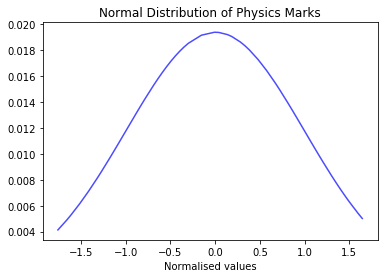

In [12]:
X = np.array(df['Physics Marks'])
X.sort()
Z = (X - mean)/std_dev
plt.title('Normal Distribution of Physics Marks')
plt.plot(Z, norm.pdf(X, mean, std_dev), color = 'blue', alpha = 0.7)
plt.xlabel('Normalised values')

### Here we can see that we have obtained a bell shaped curve.

# 6) Calculating Skewness

In [13]:
numerator = sum(([(df['Physics Marks'][i] - mean)**3 for i in range(0,100)]))/100

denominator = ((sum([(df['Physics Marks'][i] - mean)**2 for i in range(0,100)])/100)**1.5)

Coeff_Skewness = numerator/denominator
Coeff_Skewness

0.02096594723018351

In [14]:
from scipy.stats import skew

In [15]:
Coeff_Skewness_inbuilt = skew(df['Physics Marks'])

print("The value of Skewness without inbuilt libraries: ", Coeff_Skewness)
print("The value of Skewness using inbuilt libraries:   ", Coeff_Skewness_inbuilt)

The value of Skewness without inbuilt libraries:  0.02096594723018351
The value of Skewness using inbuilt libraries:    0.020965947230183538


### Here we can see that the values are equal.

In [16]:
median = df['Physics Marks'].median()
Pearsons_coeff = (3*(mean - median))/std_dev
Pearsons_coeff

0.6812208342901084

### Since Pearsons coefficient is 0.29934 which lies between -0.5 and 0.5, we can say that the data is nearly symmetrical about centre.

# 7) Calculating Kurtosis

In [17]:
numerator = sum([(df['Physics Marks'][i] - mean)**4 for i in range(0,100)])/100
denominator = sum([(df['Physics Marks'][i] - mean)**2 for i in range(0,100)])/100

Kurtosis = numerator/(denominator**2)

print("Value of Kurtosis:         ", Kurtosis)
print("Value of Excess Kurtosis: ", Kurtosis - 3)

Value of Kurtosis:          1.7580258408403011
Value of Excess Kurtosis:  -1.2419741591596989


In [18]:
from scipy.stats import kurtosis

Kurtosis_using_inbuilt = kurtosis(df['Physics Marks'])

print("Value of Excess Kurtosis using inbuilt library: " ,Kurtosis_using_inbuilt)

Value of Excess Kurtosis using inbuilt library:  -1.2419741591596987


### Hence, we can see that the values of Kurtosis by calculation and by inbuilt libraries are equal.

# 8) Visualization of Data

### The following histogram depicts the overall distribution of Total marks obtained by the students.

Text(0.5, 1.0, 'Student Marks Histogram')

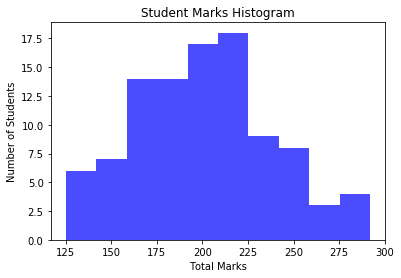

In [19]:
plt.hist(df['Total Marks'],color = 'blue', alpha = 0.7, histtype = 'stepfilled')
plt.xlabel("Total Marks")
plt.ylabel("Number of Students")
plt.title("Student Marks Histogram")

##### The following plot represents the toppers of the exam; The criteria for selection are: 
##### 1) Total Score must be greater than 250.
##### 2) They must score above 70 in all subjects individually.

Text(0.5, 1.0, 'Determining Toppers')

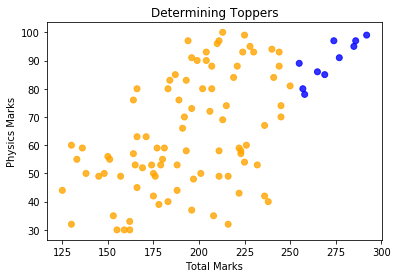

In [20]:
# Displaying all students as dots and then highlighting ones which qualify as a topper

colors = np.where(((df['Total Marks'] > 250) & (df['Maths Marks'] > 70) & (df['Physics Marks'] > 70) & (df['Chemistry Marks'] > 70)),'blue','orange')
plt.scatter(df['Total Marks'], df['Physics Marks'], color = colors, alpha = 0.8)
plt.xlabel("Total Marks")
plt.ylabel("Physics Marks")
plt.title("Determining Toppers")

#### Here we can see that there are 6 students, depicted in blue, which are the students who have performed well overall and in all subjects individually.

# 9) Conclusion

In [21]:
data = {
        'Metric': ['Mean', 'Standard Deviation', 'Pearsons Coefficient','Skewness', 'Kurtosis', 'Excess Kurtosis'],
        'Value' : [mean, std_dev, Pearsons_coeff, Coeff_Skewness, Kurtosis, Kurtosis - 3]
}
ans = pd.DataFrame(data)
ans

,Metric,Value
0,Mean,66.170000
1,Standard Deviation,20.566018
2,Pearsons Coefficient,0.681221
3,Skewness,0.020966
4,Kurtosis,1.758026
5,Excess Kurtosis,-1.241974
